In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import tensorflow as tf
import math

In [15]:
df=pd.read_csv(r"C:\Users\Hp\Desktop\CW_dataset_cleaned.csv")

In [16]:
df.head()

,BsmtQual,CentralAir,KitchenQual,N_Lot_Area,OverallQual,Fireplaces,SaleCondition,Foundation,N_Loft_Frontage,MSSubClass,...,BsmtCond,HeatingQC,GarageQual,Electrical,Heating,LotShape,FireplaceQu,GarageCond,OverallCond,N_Sales_Price
0,2.0,1,2,9.041922,7,0,4,2,4.174387,60,...,3.0,0,4.0,4.0,1,3,2.733766,4.0,5,12.247694
1,2.0,1,3,9.169518,6,1,4,1,4.382027,20,...,3.0,0,4.0,4.0,1,3,4.000000,4.0,8,12.109011
2,2.0,1,2,9.328123,7,1,4,2,4.219508,60,...,3.0,0,4.0,4.0,1,0,4.000000,4.0,5,12.317167
3,3.0,1,2,9.164296,7,1,0,0,4.094345,70,...,1.0,2,4.0,4.0,1,0,2.000000,4.0,5,11.849398
4,2.0,1,2,9.565214,8,1,4,2,4.430817,60,...,3.0,0,4.0,4.0,1,0,4.000000,4.0,5,12.429216


In [17]:
df.describe()

,BsmtQual,CentralAir,KitchenQual,N_Lot_Area,OverallQual,Fireplaces,SaleCondition,Foundation,N_Loft_Frontage,MSSubClass,...,BsmtCond,HeatingQC,GarageQual,Electrical,Heating,LotShape,FireplaceQu,GarageCond,OverallCond,N_Sales_Price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.261420,0.934932,2.339726,9.110838,6.099315,0.613014,3.770548,1.396575,4.191049,56.897260,...,2.812368,1.538356,3.864394,3.681974,1.036301,1.942466,2.733766,3.899927,5.575342,12.024051
std,0.856676,0.246731,0.830161,0.517448,1.382997,0.644666,1.100854,0.722394,0.319974,42.300571,...,0.650250,1.739524,0.593338,1.051268,0.295124,1.409156,0.822250,0.507780,1.112799,0.399452
min,0.000000,0.000000,0.000000,7.170120,1.000000,0.000000,0.000000,0.000000,3.044522,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460242
25%,2.000000,1.000000,2.000000,8.929766,5.000000,0.000000,4.000000,1.000000,4.094345,20.000000,...,3.000000,0.000000,4.000000,4.000000,1.000000,0.000000,2.000000,4.000000,5.000000,11.775097
50%,2.000000,1.000000,3.000000,9.156781,6.000000,1.000000,4.000000,1.000000,4.191049,50.000000,...,3.000000,0.000000,4.000000,4.000000,1.000000,3.000000,2.733766,4.000000,5.000000,12.001505
75%,3.000000,1.000000,3.000000,9.358890,7.000000,1.000000,4.000000,2.000000,4.369448,70.000000,...,3.000000,4.000000,4.000000,4.000000,1.000000,3.000000,2.733766,4.000000,6.000000,12.273731
max,3.000000,1.000000,3.000000,12.279532,10.000000,3.000000,5.000000,5.000000,5.746203,190.000000,...,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,9.000000,13.534473


In [18]:
df.shape

(1460, 22)

In [19]:
df.info

<bound method DataFrame.info of       BsmtQual  CentralAir  KitchenQual  N_Lot_Area  OverallQual  Fireplaces  \
0          2.0           1            2    9.041922            7           0   
1          2.0           1            3    9.169518            6           1   
2          2.0           1            2    9.328123            7           1   
3          3.0           1            2    9.164296            7           1   
4          2.0           1            2    9.565214            8           1   
...        ...         ...          ...         ...          ...         ...   
1455       2.0           1            3    8.976768            6           1   
1456       2.0           1            3    9.486076            6           2   
1457       3.0           1            2    9.109636            7           2   
1458       3.0           1            2    9.181632            5           0   
1459       3.0           1            3    9.204020            5           0   

      S

In [20]:
train_sizes = [1,20,30,40,50,60,70,80,90, 100, 300, 600, 900, 1000, 1168]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ["MSSubClass","MSZoning=C (all)","LotFrontage","MSZoning=FV","MSZoning=RH","OverallQual","MSZoning=RM","OverallCond","Fireplaces","LotShape=IR2","LotShape=IR3","LotShape=Reg","BldgType=2fmCon","BldgType=Duplex","BldgType=Twnhs","BldgType=TwnhsE","HouseStyle=1.5Fin","HouseStyle=1.5Unf","HouseStyle=1Story","HouseStyle=2.5Fin","HouseStyle=2.5Unf","HouseStyle=2Story","HouseStyle=SFoyer","HouseStyle=SLvl","Foundation=BrkTil","Foundation=PConc","Foundation=Slab","Foundation=Stone","Foundation=Wood","BsmtQual=Ex","BsmtQual=Fa","BsmtQual=Gd","BsmtQual=TA","BsmtCond=Fa","BsmtCond=Gd","BsmtCond=Po","BsmtCond=TA","Heating=Floor","Heating=GasA","Heating=GasW","Heating=Grav","Heating=OthW","Heating=Wall","HeatingQC=Ex","HeatingQC=Fa","HeatingQC=Gd","HeatingQC=Po","HeatingQC=TA","CentralAir=N","Electrical=FuseF","Electrical=FuseP","Electrical=Mix","Electrical=SBrkr","KitchenQual=Ex","KitchenQual=Fa","KitchenQual=TA","FireplaceQu=Ex","FireplaceQu=Fa","FireplaceQu=Gd","FireplaceQu=Po","FireplaceQu=TA","GarageQual=Ex","GarageQual=Fa","GarageQual=Gd","GarageQual=Po","GarageCond=Fa","GarageCond=Gd","GarageCond=Po","GarageCond=TA","SaleCondition=Abnorml","SaleCondition=AdjLand","SaleCondition=Alloca","SaleCondition=Family","SaleCondition=Normal","SaleCondition=Partial","LotArea_log"]
target = 'sale_price_log'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = df[features],
y = df[target], train_sizes = train_sizes, cv = 10,
scoring = 'neg_mean_squared_error')

KeyError: "['Foundation=Slab', 'HouseStyle=1.5Unf', 'Electrical=FuseF', 'GarageCond=Fa', 'Electrical=Mix', 'HeatingQC=Ex', 'HouseStyle=2.5Unf', 'HeatingQC=TA', 'BldgType=TwnhsE', 'SaleCondition=Abnorml', 'GarageCond=Po', 'FireplaceQu=TA', 'GarageQual=Fa', 'BsmtCond=Gd', 'SaleCondition=Partial', 'Heating=GasA', 'BsmtQual=Ex', 'MSZoning=RM', 'HouseStyle=2.5Fin', 'Heating=GasW', 'BldgType=Twnhs', 'GarageQual=Po', 'Foundation=Wood', 'Foundation=BrkTil', 'FireplaceQu=Gd', 'FireplaceQu=Fa', 'MSZoning=C (all)', 'LotShape=IR3', 'BsmtQual=TA', 'BsmtCond=Fa', 'BldgType=2fmCon', 'BsmtCond=TA', 'KitchenQual=Ex', 'KitchenQual=Fa', 'HeatingQC=Fa', 'HouseStyle=2Story', 'SaleCondition=Normal', 'BsmtCond=Po', 'Heating=Floor', 'HouseStyle=SLvl', 'Heating=Grav', 'Heating=OthW', 'CentralAir=N', 'GarageCond=Gd', 'HouseStyle=1Story', 'HouseStyle=1.5Fin', 'FireplaceQu=Ex', 'LotShape=Reg', 'LotShape=IR2', 'GarageCond=TA', 'LotArea_log', 'SaleCondition=AdjLand', 'SaleCondition=Family', 'MSZoning=FV', 'Electrical=SBrkr', 'BldgType=Duplex', 'GarageQual=Ex', 'SaleCondition=Alloca', 'Heating=Wall', 'Foundation=PConc', 'Electrical=FuseP', 'BsmtQual=Gd', 'MSZoning=RH', 'Foundation=Stone', 'HouseStyle=SFoyer', 'LotFrontage', 'GarageQual=Gd', 'HeatingQC=Gd', 'BsmtQual=Fa', 'FireplaceQu=Po', 'HeatingQC=Po', 'KitchenQual=TA'] not in index"

In [109]:
train_scores

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-2.20881053e-30, -2.68212708e-30, -2.68212708e-30,
        -2.68212708e-30, -2.68212708e-30, -2.68212708e-30,
        -2.68212708e-30, -2.68212708e-30, -2.68212708e-30,
        -2.68212708e-30],
       [-6.90989562e-27, -7.48096196e-05, -7.48096196e-05,
        -7.48096196e-05, -7.48096196e-05, -7.48096196e-05,
        -7.48096196e-05, -7.48096196e-05, -7.48096196e-05,
        -7.48096196e-05],
       [-1.75576416e-03, -3.90542547e-03, -3.90542547e-03,
        -3.90542547e-03, -3.90542547e-03, -3.90542547e-03,
        -3.90542547e-03, -3.90542547e-03, -3.90542547e-03,
        -3.90542547e-03],
       [-3.35815489e-03, -4.02740905e-03, -4.02740905e-03,
        -4.02740905e-03, -4.02740905e-03, -4.02740905e-03,
        -4.02740905e-03, -4.02740905e-03, -4.02740905e-03,
        -4.

In [110]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-2.20881053e-30 -2.68212708e-30 -2.68212708e-30 -2.68212708e-30
  -2.68212708e-30 -2.68212708e-30 -2.68212708e-30 -2.68212708e-30
  -2.68212708e-30 -2.68212708e-30]
 [-6.90989562e-27 -7.48096196e-05 -7.48096196e-05 -7.48096196e-05
  -7.48096196e-05 -7.48096196e-05 -7.48096196e-05 -7.48096196e-05
  -7.48096196e-05 -7.48096196e-05]
 [-1.75576416e-03 -3.90542547e-03 -3.90542547e-03 -3.90542547e-03
  -3.90542547e-03 -3.90542547e-03 -3.90542547e-03 -3.90542547e-03
  -3.90542547e-03 -3.90542547e-03]
 [-3.35815489e-03 -4.02740905e-03 -4.02740905e-03 -4.02740905e-03
  -4.02740905e-03 -4.02740905e-03 -4.02740905e-03 -4.02740905e-03
  -4.02740905e-03 -4.02740905e-03]
 [-6.10527643e-03 -4.03194256e-03 -4.03194256e-03 -4.03194256e-03
  -4.03194256e-03 -4.03194256e-03 -4.03194256e-03 -4.03194256e-03
  -4.03194256e

In [111]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
20      2.634795e-30
30      6.732866e-05
40      3.690459e-03
50      3.960484e-03
60      4.239276e-03
70      5.011232e-03
80      6.416934e-03
90      7.162493e-03
100     8.130224e-03
300     1.574900e-02
600     2.450908e-02
900     2.481686e-02
1000    2.446037e-02
1168    2.493290e-02
dtype: float64

 --------------------

Mean validation scores

 1         0.222379
20        0.058187
30      187.455185
40        0.238756
50        0.161672
60        0.103848
70        0.085567
80        0.086317
90        0.065241
100       0.069905
300       0.034061
600       0.032557
900       0.030255
1000      0.029710
1168      0.029622
dtype: float64


(0.0, 0.15)

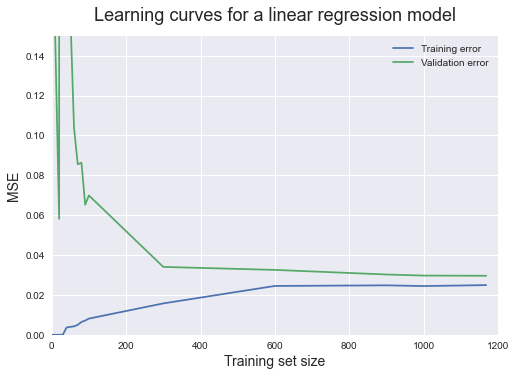

In [112]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.xlim(0,1200)
plt.ylim(0,0.15)


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ["MSSubClass","MSZoning=C (all)","LotFrontage","MSZoning=FV","MSZoning=RH","OverallQual","MSZoning=RM","OverallCond","Fireplaces","LotShape=IR2","LotShape=IR3","LotShape=Reg","BldgType=2fmCon","BldgType=Duplex","BldgType=Twnhs","BldgType=TwnhsE","HouseStyle=1.5Fin","HouseStyle=1.5Unf","HouseStyle=1Story","HouseStyle=2.5Fin","HouseStyle=2.5Unf","HouseStyle=2Story","HouseStyle=SFoyer","HouseStyle=SLvl","Foundation=BrkTil","Foundation=PConc","Foundation=Slab","Foundation=Stone","Foundation=Wood","BsmtQual=Ex","BsmtQual=Fa","BsmtQual=Gd","BsmtQual=TA","BsmtCond=Fa","BsmtCond=Gd","BsmtCond=Po","BsmtCond=TA","Heating=Floor","Heating=GasA","Heating=GasW","Heating=Grav","Heating=OthW","Heating=Wall","HeatingQC=Ex","HeatingQC=Fa","HeatingQC=Gd","HeatingQC=Po","HeatingQC=TA","CentralAir=N","Electrical=FuseF","Electrical=FuseP","Electrical=Mix","Electrical=SBrkr","KitchenQual=Ex","KitchenQual=Fa","KitchenQual=TA","FireplaceQu=Ex","FireplaceQu=Fa","FireplaceQu=Gd","FireplaceQu=Po","FireplaceQu=TA","GarageQual=Ex","GarageQual=Fa","GarageQual=Gd","GarageQual=Po","GarageCond=Fa","GarageCond=Gd","GarageCond=Po","GarageCond=TA","SaleCondition=Abnorml","SaleCondition=AdjLand","SaleCondition=Alloca","SaleCondition=Family","SaleCondition=Normal","SaleCondition=Partial","LotArea_log"]
target = 'sale_price_log'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = df[features],
y = df[target], train_sizes = train_sizes, cv = 10,
scoring = 'r2')

C:\Users\samid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\samid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\samid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\samid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\samid\AppData\Local\Programs\Python\Python39\lib\si

In [114]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean =validation_scores.mean(axis = 1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1            NaN
20      1.000000
30      0.999537
40      0.981056
50      0.977585
60      0.976530
70      0.971477
80      0.962033
90      0.956122
100     0.949564
300     0.896082
600     0.854713
900     0.849848
1000    0.850222
1168    0.843502
dtype: float64

 --------------------

Mean validation scores

 1         -0.417494
20         0.627885
30     -1313.113795
40        -0.585807
50        -0.028162
60         0.343026
70         0.456307
80         0.456666
90         0.587658
100        0.558660
300        0.786241
600        0.795369
900        0.809623
1000       0.813074
1168       0.813989
dtype: float64


(-2.0, 2.0)

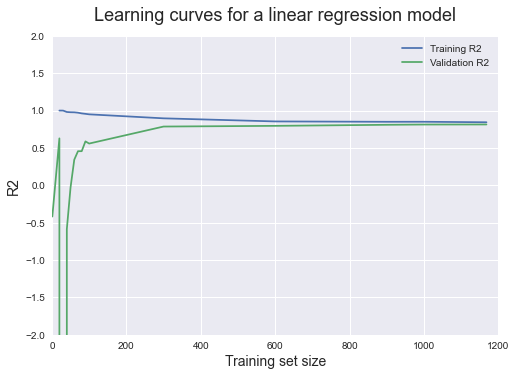

In [118]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training R2')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation R2')
plt.ylabel('R2', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.xlim(0,1200)
plt.ylim(-2,2)